In [2]:
#2. Create Multiple Regression for the “Restaurant Revenue Prediction” dataset.
#importing libraries to generate a dataframe from csv data and perform preprocrssing 
import pandas as pd
import numpy as np

In [3]:
#generating dataframe using csv file
train = pd.read_csv('train.csv').dropna()
test= pd.read_csv('test.csv').dropna()
#droping null values and non numaric values
test=test.select_dtypes(include=[np.number]).interpolate().dropna()
#looking into the data
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [4]:
test.head()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,1,4.0,4.0,4.0,1,2,5,4,5,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,3,4.0,4.0,4.0,2,2,5,3,4,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,3,4.0,4.0,4.0,2,2,5,4,4,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,2,4.0,4.0,4.0,2,3,5,4,5,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,2,4.0,4.0,4.0,1,2,5,4,5,...,5.0,3.0,0,0,0,0,0,0,0,0


In [5]:
#spliting target and independent varibles
y_train=train['revenue']
X_train=train.drop(['revenue'], axis=1)
X_train=X_train.select_dtypes(include=[np.number]).interpolate().dropna()

In [6]:
X_train.head()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,4,5.0,4.0,4.0,2,2,5,4,5,...,2.0,3.0,5,3,4,5,5,4,3,4
1,1,4,5.0,4.0,4.0,1,2,5,5,5,...,3.0,3.0,0,0,0,0,0,0,0,0
2,2,2,4.0,2.0,5.0,2,3,5,5,5,...,1.0,3.0,0,0,0,0,0,0,0,0
3,3,6,4.5,6.0,6.0,4,4,10,8,10,...,2.5,7.5,25,12,10,6,18,12,12,6
4,4,3,4.0,3.0,4.0,2,2,5,5,5,...,1.0,3.0,5,1,3,2,3,4,3,3


In [7]:
#training the model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions=model.predict(X_train)

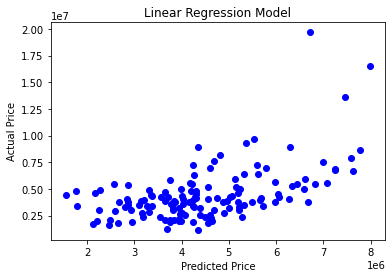

In [8]:
#ploting graph between actual and predicted values
import matplotlib.pyplot as plt
plt.scatter(predictions, y_train, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [47]:
#3.Evaluate the model using MAE, MSE, RMSE and R2 score
from sklearn import metrics
mae = metrics.mean_absolute_error(y_train, predictions)
mse = metrics.mean_squared_error(y_train, predictions)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_train,predictions)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('r^2:', r2)

Mean Absolute Error: 1502756.0631651962
Mean Squared Error: 4654326715639.523
Root Mean Squared Error: 2157388.8651885465
r^2: 0.2934829180620052
